In [489]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno

In [490]:
DATA_PATH = './data/'
df = pd.read_csv(DATA_PATH + 'nobel_prize_by_winner.csv')
df

,index,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,...,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,0,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,...,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA
1,1,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,...,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA
2,2,783,Wangari Muta,Maathai,4/1/1940,9/25/2011,Kenya,KE,Nyeri,Kenya,...,Nairobi,female,2004.0,peace,NaN,1.0,"""for her contribution to sustainable developme...",NaN,NaN,NaN
3,3,230,Dorothy Crowfoot,Hodgkin,5/12/1910,7/29/1994,Egypt,EG,Cairo,United Kingdom,...,Shipston-on-Stour,female,1964.0,chemistry,NaN,1.0,"""for her determinations by X-ray techniques of...","University of Oxford, Royal Society",Oxford,United Kingdom
4,4,918,Youyou,Tu,12/30/1930,0000-00-00,China,CN,Zhejiang Ningbo,NaN,...,NaN,female,2015.0,medicine,NaN,2.0,"""for her discoveries concerning a novel therap...",China Academy of Traditional Chinese Medicine,Beijing,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,967,525,United Nations Children's Fund (UNICEF),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,org,1965.0,peace,NaN,1.0,NaN,NaN,NaN,NaN
968,968,527,International Labour Organization (I.L.O.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,org,1969.0,peace,NaN,1.0,NaN,NaN,NaN,NaN
969,969,537,Amnesty International,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,org,1977.0,peace,NaN,1.0,NaN,NaN,NaN,NaN
970,970,547,International Physicians for the Prevention of...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,org,1985.0,peace,NaN,1.0,NaN,NaN,NaN,NaN


index                  0
id                     0
firstname              6
surname               36
born                  26
died                  26
bornCountry           32
bornCountryCode       32
bornCity              34
diedCountry          371
diedCountryCode      372
diedCity             377
gender                 0
year                   6
category               6
overallMotivation    956
share                  6
motivation            94
name                 252
city                 258
country              258
dtype: int64


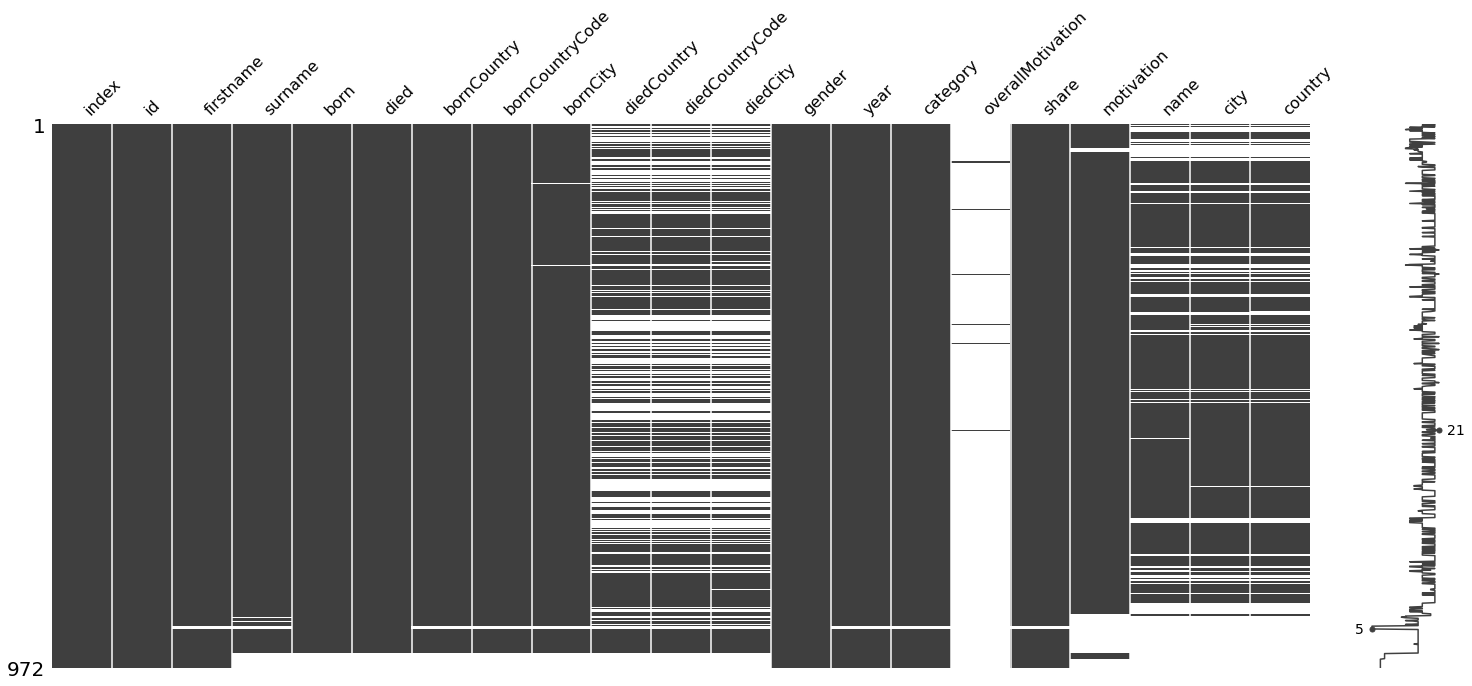

In [491]:
# df = df['born'].dropna()
# df = df['bornCountry'].dropna()
# df.drop( df[ (df.born == '') ], inplace = True)
# df['born'] = df['born'].map(lambda x: x.split('/')[2])
# df.drop( df[ (df.born == '0000/00/00') ] )
df['born'] = df['born'].replace('0000/00/00', '')
# df.born.drop()

msno.matrix(df)
print(df.isnull().sum())

In [492]:
## born country, born, name, index
# df = df[df.firstname, df.surname, df.born, df.bornCountry]
df = df[['bornCountry', 'born', 'firstname', 'surname']]
df['fullname'] = df['firstname'] + ' ' + df['surname']
# df['born'] = df[(df.born != '') | (df.born != '0000/00/00')]
# df = df[ (df.born.isnotnull()) | df.born.isnotna() ]
df = df[ ( df.born.notnull() ) & ( df.bornCountry.notnull() ) ]
# df = df.dropna()
# df = df.drop(index = (946, 971))

/var/folders/yf/mmrj8c9d2zbfn3w8crhhf0_r0000gn/T/ipykernel_97368/189453605.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fullname'] = df['firstname'] + ' ' + df['surname']


In [493]:
# msno.matrix(df)
# df.isnull().sum()
# df['born'] = df['born'].map(lambda x: x.split('/')[2])
# df['bornYear'] = df['born'].str.split('/')[2]
data = df.groupby([ 'bornCountry' ])['born'].count().sort_values(ascending = False)
top20_Nobel_price = data[ :20 ]
top20_Nobel_price

bornCountry
USA                     275
United Kingdom           87
Germany                  70
France                   53
Sweden                   30
Japan                    29
Russia                   20
the Netherlands          19
Canada                   18
Italy                    18
Switzerland              17
Austria                  15
Norway                   13
China                    12
Australia                11
Denmark                  11
Germany (now Poland)     10
South Africa              9
Scotland                  9
Belgium                   9
Name: born, dtype: int64

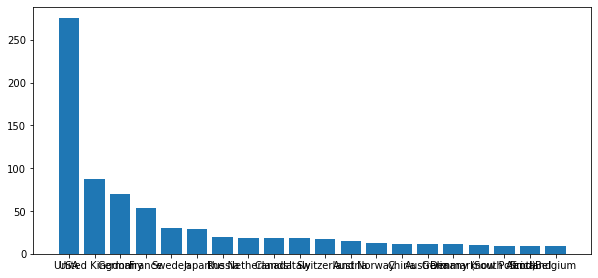

In [503]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(2, 1, 1)

# x_axis = np.arange(0, int(max(top20_Nobel_price)) + 10, 10)
y_axis = top20_Nobel_price.values
x_axis = top20_Nobel_price.index

ax.bar(x_axis, y_axis)
plt.show()